# Teste de Redes GGRBF para dados sintéticos e reais

Bibliotecas úteis para teste

In [2]:
from src.utils.result_section_utils import (
    two_classes_scatter,
    plot_decision_surface,
    GGRBF_K_Fold_Performance,
)
from src.models.GGRBF import GGRBF
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, load_breast_cancer
from src.models.graphs import Gabriel_Graph as GG
import numpy as np

## Teste para dados sintéticos: Duas Luas

*   Teste feito para dados sintéticos da base [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)
*   Existem 250 amostras na classe 1 e 50 na classe 2, totalizando 300 amostras. Foi escolhido um ruído de 0.2
*   O desempenho foi avaliado através da AUC, utilizando validação cruzada com K-fold, tomando um k=10
*   O desempenho é de $0.97\pm0.05$

### Visualização dos pontos gerados.

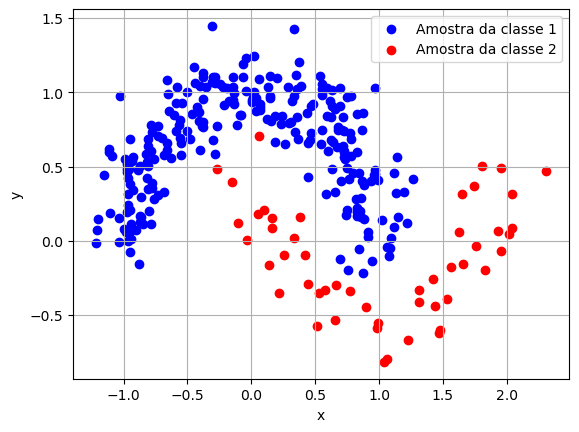

In [17]:
X, y = make_moons((250,50), noise=0.15)
two_classes_scatter(X, y)

### Visualização do grafo de Gabriel aplicado aos dados.

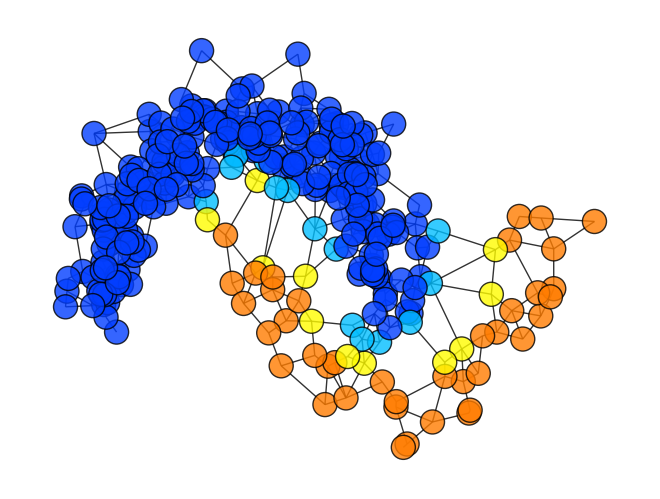

In [18]:
X = pd.DataFrame(X)
y = np.array(y)

y = 1*(y == 1)

graph = GG.Gabriel_Graph(X, y)
graph.build()
graph.calculate_centers()
graph.plot(label=False, show_centers=True)

### Visualização da AUC a partir de K-fold.

In [19]:
X = pd.DataFrame(X)
y = 2 * (y == 1) - 1


mean, std = GGRBF_K_Fold_Performance(X, y, k=10, perf_metric="auc")
print(f'Média:{mean:.2f}, Desvio: {std:.2f}')

Média:0.97, Desvio: 0.05


### Visualização da superfície de separação.

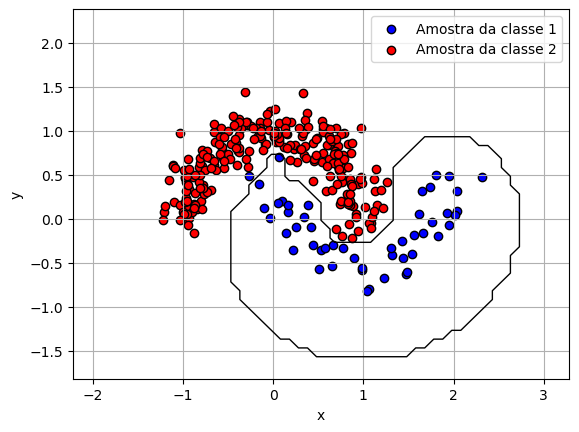

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = GGRBF(sigma=1)
model.fit_model(X_train, y_train, classification=True)

plot_decision_surface(X, y, model)

## Teste para dados reais: Breast Cancer

*   Teste feito para a base de dados [breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
*   Existem 569 amostras rotuladas, cujas características somam 30 valores numéricos baseados em análise morfológica de células mamárias.
*   O desempenho também foi avaliado utilizando a AUC, a partir de K-fold com k=10
*   O desempenho é de $0.97\pm0.03$

In [17]:
from sklearn.preprocessing import MinMaxScaler

X, y = load_breast_cancer(return_X_y=True)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
y = 2 * (y == 1) - 1


mean, std = GGRBF_K_Fold_Performance(X, y, k=10, perf_metric="auc")
print(f'Média:{mean:.2f}, Desvio: {std:.2f}')

Média:0.97, Desvio: 0.03
